In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

df = pd.read_csv('dataset3.0.csv')
X = df[["channel frequency","hour_normal","tags_length_normal","title_length_normal","stop_words_count_tags_normal","title_contains_brackets","title_contains_num","title_contains_special","description_contains_facebook","description_contains_instagram"]]
df_select_withlike = df[["daily_likes_normal","daily_dislikes_normal","daily_comment_count_normal","channel frequency","description_contains_facebook","description_contains_instagram","title_contains_num","title_contains_special", "title_contains_brackets","title_length_normal", "tags_length_normal", "hour_normal", "stop_words_count_tags_normal" ]]
y = df[["daily_views"]]
df_x = df["category_id"]
dummy_x = pd.get_dummies(df_x)
X_all = X.join(dummy_x)
dummy_x

,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [2]:
y = np.log(y + 1)
y

,daily_views
0,12.832514
1,14.005628
2,13.877369
3,12.052834
4,13.456802
5,10.995260
6,13.460463
7,12.515680
8,12.931276
9,11.761456


0.23485865124790362
2.4659122289274684
[ 2.35456989 -0.30236119  0.58928839 -0.46286082  0.          0.22976812
  0.08704922  0.14880327 -0.05085273  0.18868295  0.2459812   0.
  0.69987538 -0.32543076 -0.         -0.          0.60091421  0.05214705
  0.16445622  0.00238007 -0.93382808 -0.38527182 -0.39458734 -0.1201101
 -0.         -0.        ]
9.332185226329338


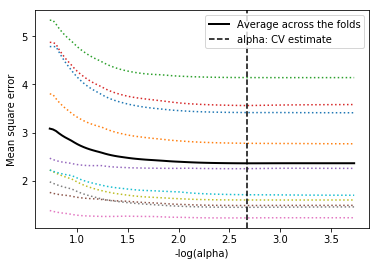

In [21]:
# kf = KFold(n_splits=10, shuffle = True)
# kf.get_n_splits(X)
# lm = LinearRegression()
# scores = cross_val_score(lm, X, y, cv=10, scoring="neg_mean_squared_error")
# print(scores)
# y = np.log(y)
# print(y)
reg = LassoCV(cv=10, random_state=0).fit(X_all, y.values.ravel())
print(reg.score(X_all, y))
print(reg.mse_path_.mean())
print(reg.coef_)
print(reg.intercept_)
m_log_alphas = -np.log10(reg.alphas_)
plt.plot(m_log_alphas, reg.mse_path_, ':')
plt.plot(m_log_alphas, reg.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(reg.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')

plt.axis('tight')
plt.show()

In [4]:
# # fix the sign of MSE scores
# mse_scores = -scores
# print(mse_scores.mean())

[12.83251362 14.00562831 13.87736924 ... 10.54765455 12.18178508
 12.78095417]


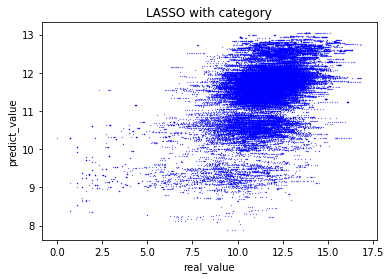

In [6]:
y_predit = reg.predict(X_all)
y_predit_list = y_predit.tolist()
# y_predit = y_predit.reshape(len(y_predit),1)
# y_predit.shape
y_train = y.values.reshape(len(y))
y_train_list = y_train.tolist()
print(y_train)
plt.xlabel("real_value")
plt.ylabel("predict_value")
plt.scatter(y_train_list, y_predit_list,c = 'b',s = 0.05)
plt.title('LASSO with category')
plt.show()

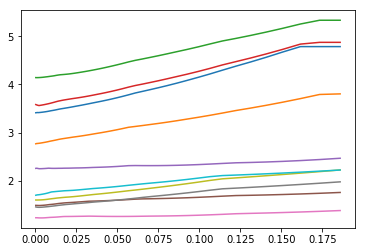